<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2018/19</h2>
<h2>Daniela Paolotti & Michele Tizzoni</h2>
<h3>Notebook 7 - Epidemics on networks.</h3>
<hr>
</center>

We use the Python library ["Epidemics on Networks" developed by Kiss, Miller & Simon](https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks).
The library documentation is [available here](http://epidemicsonnetworks.readthedocs.io/en/latest/). 

In [1]:
import EoN
import networkx as nx
import numpy as np
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Homogeneous network

We simulate the spread of an SIR on an Erdos-Renyi graph with constant recovery rate.

In [2]:
N=10000
p=0.001
G=nx.fast_gnp_random_graph(N, p)

In [3]:
nx.is_connected(G)

True

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 50220
Average degree:  10.0440


---
# The epidemic threshold for this network can be approximated as $\lambda_c = \frac{\mu}{\langle k \rangle}$

In [5]:
mu=0.2

In [6]:
avg_deg1=2*len(G.edges)/N
lc=mu/avg_deg1
print(lc)

0.019912385503783353


# As expected for this network, we have $\langle k^2 \rangle \sim \langle k \rangle^2 + \langle k \rangle$

In [7]:
sum_k2=0
for i in G.nodes():
    k=G.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)  

110.867


In [8]:
avg_deg1**2 + avg_deg1

110.92593600000001

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$.

In [10]:
final_size=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):
        t, S, I, R = EoN.fast_SIR(G, lambd, mu, rho=0.05)
        
        final_size[lambd].append(R[-1]/N)

In [11]:
homo_net_size=pd.DataFrame.from_dict(final_size)

In [12]:
homo_net_size.head()

,0.0001,0.0001623776739188721,0.00026366508987303583,0.00042813323987193956,0.0006951927961775605,0.0011288378916846883,0.0018329807108324356,0.002976351441631319,0.004832930238571752,0.007847599703514606,0.012742749857031334,0.0206913808111479,0.03359818286283781,0.05455594781168514,0.08858667904100823,0.14384498882876628,0.23357214690901212,0.3792690190732246,0.615848211066026,1.0
0,0.0503,0.0503,0.0511,0.0514,0.0525,0.0528,0.0535,0.0597,0.0629,0.0753,0.1100,0.2123,0.6134,0.8637,0.9459,0.9836,0.9962,0.9988,0.9997,0.9998
1,0.0503,0.0501,0.0503,0.0514,0.0516,0.0526,0.0550,0.0568,0.0633,0.0761,0.1031,0.2488,0.6037,0.8489,0.9515,0.9860,0.9950,0.9984,0.9997,0.9998
2,0.0502,0.0501,0.0502,0.0515,0.0516,0.0524,0.0551,0.0610,0.0635,0.0720,0.1071,0.2577,0.6227,0.8388,0.9505,0.9843,0.9965,0.9981,0.9994,0.9998
3,0.0505,0.0512,0.0507,0.0509,0.0518,0.0532,0.0547,0.0573,0.0620,0.0750,0.1052,0.2551,0.5946,0.8490,0.9560,0.9846,0.9961,0.9993,0.9994,0.9999
4,0.0505,0.0502,0.0509,0.0511,0.0516,0.0536,0.0545,0.0573,0.0645,0.0743,0.1197,0.2446,0.5617,0.8520,0.9458,0.9837,0.9957,0.9984,0.9997,0.9998


Text(0.5,0,'$\\lambda$')

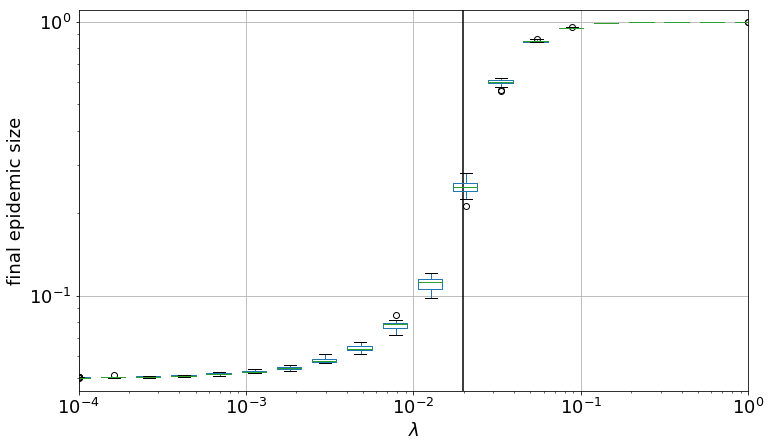

In [15]:
plt.figure(figsize=(12,7))

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), 
                      widths=np.array(homo_net_size.columns)/3)
plt.vlines(x=lc, ymin=0.045, ymax=1.1)

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Barabàsi-Albert model network

In [16]:
N=10000
AB=nx.barabasi_albert_graph(N, 5)

In [17]:
nx.is_connected(AB)

True

In [18]:
print(nx.info(AB))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 49975
Average degree:   9.9950


In [19]:
sum_k2=0
for i in AB.nodes():
    k=AB.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)    

270.7546


In [20]:
avg_deg=2*len(AB.edges)/N
print(avg_deg)

9.995


# The threshold can be approximated as $\lambda_c \sim \mu \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$ 

In [21]:
lambda_c=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c)

0.007666064835196863


In [22]:
lc/lambda_c

2.6020829927840188

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [17]:
final_size_AB=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 100):
        
        t, S, I, R = EoN.fast_SIR(AB, lambd, mu, rho=0.05)
        
        final_size_AB[lambd].append(R[-1]/N)

In [18]:
sf_net_size=pd.DataFrame.from_dict(final_size_AB)

In [19]:
sf_net_size.tail()

,0.0001,0.0001623776739188721,0.00026366508987303583,0.00042813323987193956,0.0006951927961775605,0.0011288378916846883,0.0018329807108324356,0.002976351441631319,0.004832930238571752,0.007847599703514606,0.012742749857031334,0.0206913808111479,0.03359818286283781,0.05455594781168514,0.08858667904100823,0.14384498882876628,0.23357214690901212,0.3792690190732246,0.615848211066026,1.0
95,0.0502,0.0506,0.0507,0.0514,0.0524,0.0535,0.0556,0.0609,0.0658,0.1060,0.1816,0.3447,0.5652,0.7624,0.9068,0.9693,0.9912,0.9982,0.9996,1.0000
96,0.0502,0.0506,0.0505,0.0507,0.0523,0.0531,0.0565,0.0581,0.0680,0.0939,0.2026,0.3577,0.5897,0.7850,0.9041,0.9663,0.9923,0.9980,0.9996,0.9999
97,0.0501,0.0507,0.0508,0.0511,0.0521,0.0527,0.0545,0.0594,0.0686,0.1034,0.1966,0.3407,0.5720,0.7669,0.9037,0.9679,0.9920,0.9987,0.9996,1.0000
98,0.0505,0.0502,0.0506,0.0505,0.0531,0.0533,0.0554,0.0591,0.0679,0.0902,0.1592,0.3729,0.5796,0.7866,0.9087,0.9699,0.9893,0.9983,0.9995,0.9999
99,0.0503,0.0500,0.0508,0.0510,0.0517,0.0534,0.0552,0.0600,0.0734,0.1038,0.1726,0.3624,0.5774,0.7777,0.9068,0.9693,0.9916,0.9985,0.9998,1.0000


Text(0.5,0,'$\\lambda$')

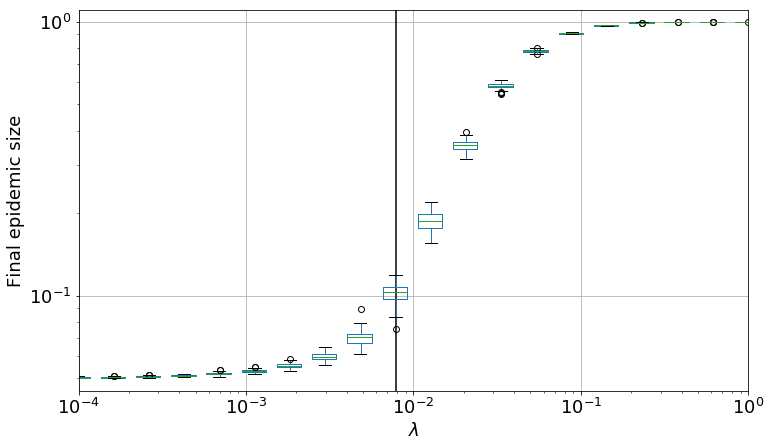

In [44]:
plt.figure(figsize=(12,7))

#homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3 )

plt.vlines(x=lambda_c, ymin=0.04, ymax=1.1)
sf_net_size.boxplot(positions=np.array(sf_net_size.columns), widths=np.array(sf_net_size.columns)/3)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Configuration model network

We can use the configuration model to generate a network with a given power-law degree distribution. By setting $\gamma=2.1$, we expect to see more fluctuations in the degree distribution.

We create a function that samples from a power-law distribution between $k_{min}$ and $k_{max}$ with exponent $\gamma$

In [16]:
def get_activity(x0,x1,g):
    y=random.uniform(0,1)
    e=g+1.
    a=((x1**e-x0**e)*y+x0**e)**(1./e)
    return a

In [31]:
N=10000
kmin=2
kmax=N-1
a=[]
for i in range(N):
    act=get_activity(kmin,kmax,-2.1)
    a.append(int(round(act)))

if sum(a)%2==0:
    G1=nx.configuration_model(a)
else:
    a[-1]+=1
    G1=nx.configuration_model(a)

In [18]:
nx.is_connected(G1)

True

In [19]:
print(nx.info(G1))

Name: 
Type: MultiGraph
Number of nodes: 10000
Number of edges: 62176
Average degree:  12.4352


In [20]:
G1=nx.Graph(G1)

In [21]:
G1.remove_edges_from(G1.selfloop_edges())

In [22]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 50205
Average degree:  10.0410


In [23]:
nx.is_connected(G1)

True

In [24]:
sum_k2=0
for i in G1.nodes():
    k=G1.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)

2719.6674


In [25]:
avg_deg=2*len(G1.edges)/N
print(avg_deg)

10.041


In [26]:
lambda_c1=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c1)

0.0007411353830919274


In [27]:
lc/lambda_c1

26.867406357946752

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [28]:
final_size_conf=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):
        
        t, S, I, R = EoN.fast_SIR(G1, lambd, mu, rho=0.05)
        
        final_size_conf[lambd].append(R[-1]/N)

In [29]:
conf_net_size=pd.DataFrame.from_dict(final_size_conf)

Text(0.5,0,'$\\lambda$')

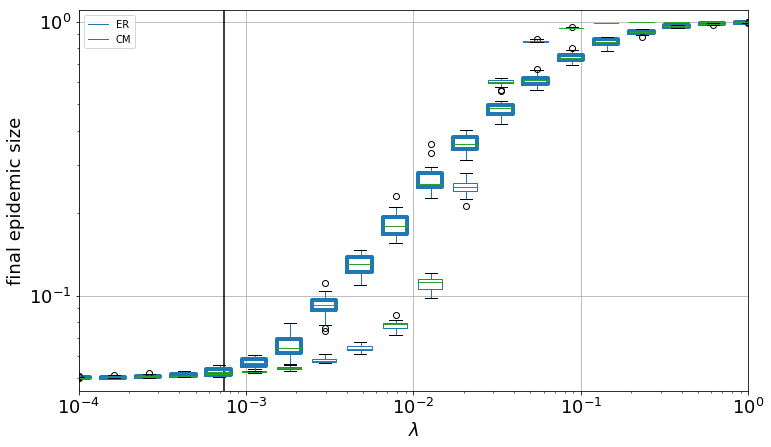

In [30]:
plt.figure(figsize=(12,7))

boxprops1 = dict(linestyle='-', linewidth=4, color='b')

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3)

conf_net_size.boxplot(positions=np.array(conf_net_size.columns), widths=np.array(conf_net_size.columns)/3, boxprops=boxprops1)

plt.vlines(x=lambda_c1, ymin=0.04, ymax=1.1)
plt.legend(['ER','CM'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)